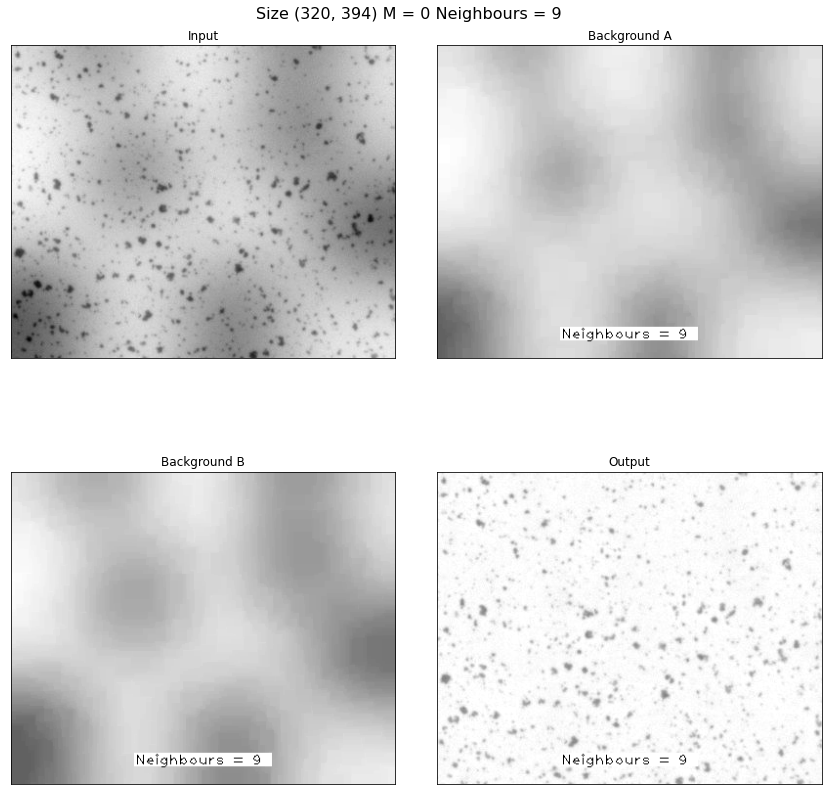

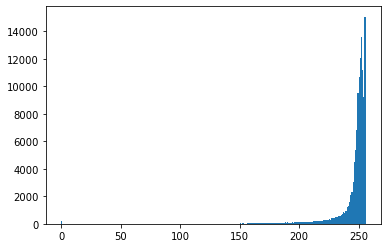

Pixels: (320, 394)  Neighbours: 9  Time : 5.8 secs


In [94]:
#Author - Kovid Sharma
#zID - z5240067

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def GetTime(seconds):
    h = int(seconds//(60*60))
    m = int((seconds-h*60*60)//60)
    s = seconds-(h*60*60)-(m*60)
    if h == 0 and m == 0:
        return str(f'{round(s,1)} secs')
    if h == 0:
        return str(f'{m}:{round(s,1)} mins')
    if m == 0:
        return str(f'{round(s,1)} secs')
    return str(f'{h} hours {m}:{round(s,1)} mins')

def min_max_neighbours(image, x, y, number_of_neighbours, M):
    rows, cols = image.shape
    row_start = x - number_of_neighbours
    row_end = x + number_of_neighbours + 1
    col_start = y - number_of_neighbours
    col_end = y + number_of_neighbours + 1
    if row_start < 0: # for row boundary
        row_start = 0
    if row_start > rows:
        row_start = rows
    if row_end < 0:
        row_end = 0
    if row_end > rows:
        row_end = rows
    if col_start < 0: # for column boundary
        col_start = 0
    if col_start > cols:
        col_start = cols
    if col_end < 0:
        col_end = 0
    if col_end > cols:
        col_end = cols
    #make a boundary array (sub-matrix for cal min-max)
    neighbours = image[row_start:row_end , col_start:col_end]
    if M == 0:
        return np.amax(neighbours)
    if M == 1:
        return np.amin(neighbours)

def filter_image(I, number_of_neighbours, M):
    rows, cols = I.shape
    img = np.full((rows, cols), 255, dtype = 'int16') # blank white image
    for i in range(rows):
        for j in range(cols):
            img[i,j] = min_max_neighbours(I, i, j, number_of_neighbours, M)
    return (img)

def remove_background(I, number_of_neighbours, M):
    rows,cols = I.shape
    txt = 'Neighbours = '+ str(number_of_neighbours)
    xval = int((cols/2) - 70)
    yval = int(rows - 20)
    
    if M == 0: #particles
        A = filter_image(I, number_of_neighbours, 0)
        B = filter_image(A, number_of_neighbours, 1)
        AB_txt = 'particles '+str(M)+' '+str(number_of_neighbours)+'.png'
        #removing background
        O = I - B + 255

    if M == 1: #cells
        A = filter_image(I, number_of_neighbours, 1)
        B = filter_image(A, number_of_neighbours, 0)
        AB_txt = 'cells '+str(M)+' '+str(number_of_neighbours)+'.png'
        #removing background
        O = I - B      

    #put labels output image O
    O[yval-12:yval+2, xval-1:xval+140] = 255
    cv2.putText(O, txt, (xval,yval), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0), 1)
    #put labels for A and B
    A[yval-12:yval+2, xval-1:xval+140] = 255
    cv2.putText(A, txt, (xval,yval), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0), 1)
    B[yval-12:yval+2, xval-1:xval+140] = 255
    cv2.putText(B, txt, (xval,yval), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0), 1)
    
#     #write images A, B, O
#     cv2.imwrite('O '+str(O.shape)+' '+str(M)+' '+str(number_of_neighbours)+'.png',O)
#     cv2.imwrite('A '+AB_txt,A) 
#     cv2.imwrite('B '+AB_txt,B)

    #plotting
    fig, axs = plt.subplots(2,2,figsize=(12,12)) #increase window size
    fig.tight_layout(rect=[0, 0, 1, 1])
    text = 'Size '+str(O.shape)+' M = '+str(M)+' Neighbours = '+str(number_of_neighbours)
    fig.suptitle(text, fontsize=16)
    plt.subplot(2,2,1),plt.imshow(I,cmap = 'gray')
    plt.title('Input'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(A,cmap = 'gray')
    plt.title('Background A'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(B,cmap = 'gray')
    plt.title('Background B'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(O,cmap = 'gray')
    plt.title('Output'), plt.xticks([]), plt.yticks([])
#     plt.savefig('Plot '+str(O.shape)+' '+str(M)+' '+str(number_of_neighbours)+'.png')
    plt.show()
    plt.hist(O.ravel(),256,[0,256]); plt.show() # histogram
#     plt.close(fig)

def main_process(filename):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    #find percentage of black background and choose M automatically
    size = I.shape[0] * I.shape[1]
    gray = (I < 128).sum()
    black_percentage = ((gray/size) * 100)
    black = True if black_percentage > 50 else False
    (M, N) = (1, 25) if black else (0, 9)
    start_time = time.time()
    remove_background(I, N, M)
    print('Pixels:', I.shape,' Neighbours:',N,' Time :', GetTime(time.time() - start_time))

filename = 'Particles.png'
# filename = 'Cells.png'
main_process(filename)